# Démarche de travail

## Définir un objectif mesurable

## EDA (Exploratory Data Analysis)

### Conclusion initiales

## Pre-processing

## Modelling

# Application

## EDA 

### Analyse de la forme

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/QuentinGENSE/OneDrive - Airflux/Documents/Dataset/archive/data_cmpr_ext.csv')

In [3]:
data.head()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor
0,1,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,...,0.383773,2.649801,1.213344,1.409218,2.962484,Ok,Ok,Clean,Clean,Stable
1,2,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,...,0.450954,2.669423,1.210674,1.379050,2.938135,Ok,Ok,Clean,Clean,Stable
2,3,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,...,0.443924,2.772009,1.210612,1.373490,2.991878,Ok,Ok,Clean,Clean,Stable
3,4,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,...,0.370457,2.876056,1.213223,1.443234,3.096158,Ok,Ok,Clean,Clean,Stable
4,5,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,...,0.383868,2.849451,1.209216,1.405190,3.059417,Ok,Ok,Clean,Clean,Stable


In [4]:
df1 = data.copy()

In [5]:
df1.shape

(1000, 26)

In [6]:
df1.dtypes.value_counts()

float64    19
object      5
int64       2
Name: count, dtype: int64

<Axes: >

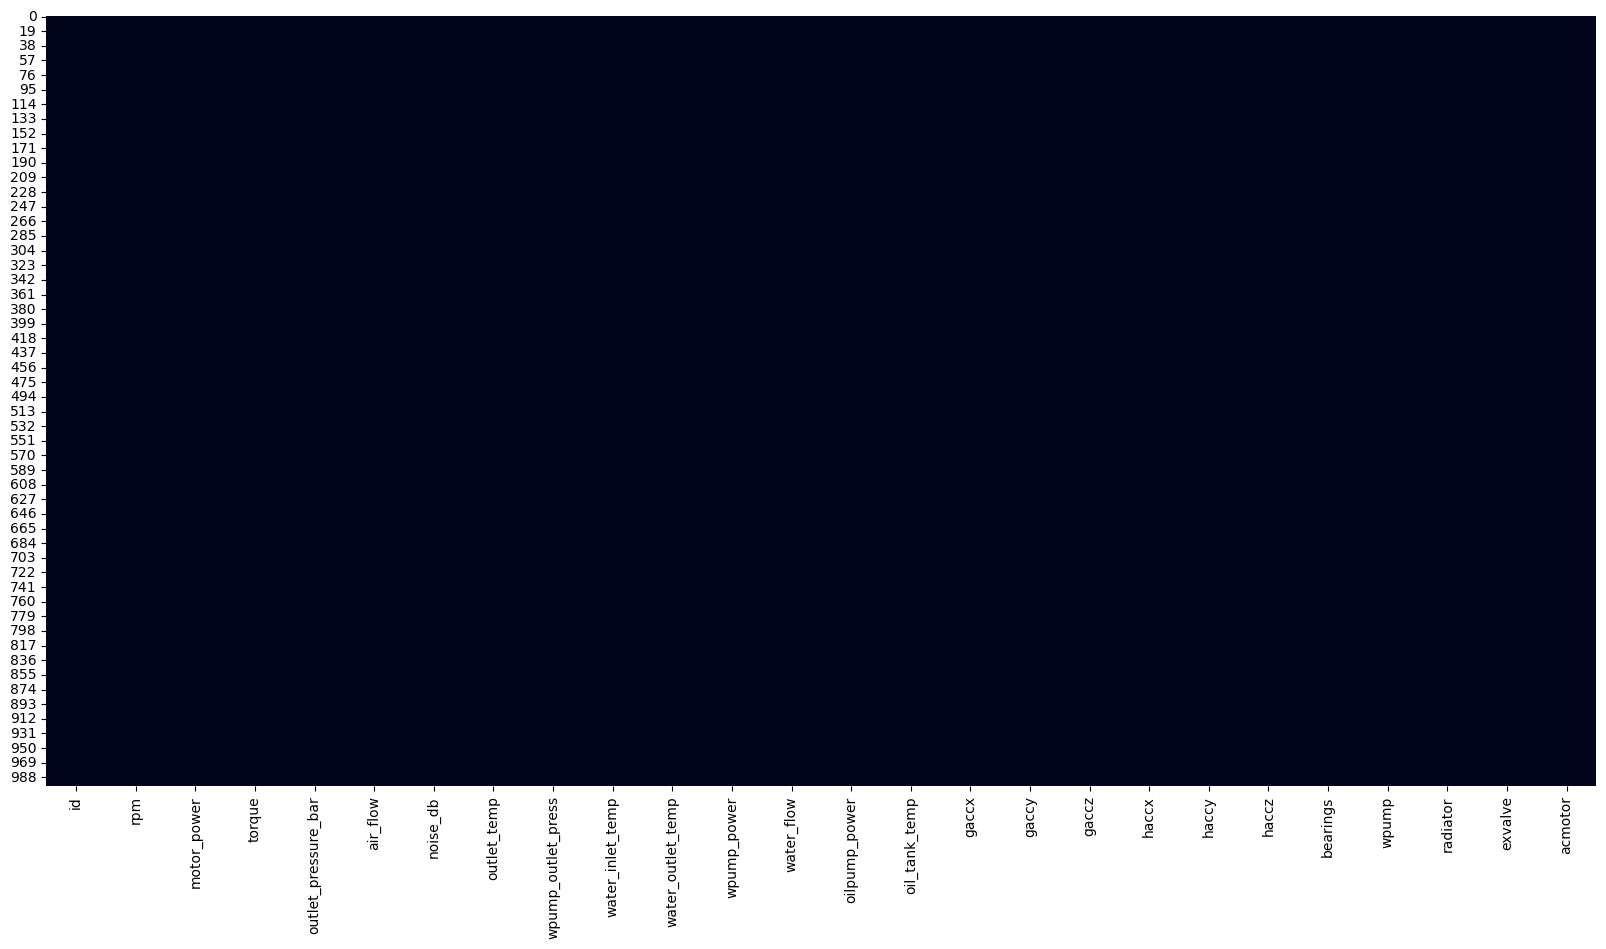

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.isna(), cbar=False)

In [8]:
(df1.isna().sum()/df1.shape[0]).sort_values()

id                     0.0
radiator               0.0
wpump                  0.0
bearings               0.0
haccz                  0.0
haccy                  0.0
haccx                  0.0
gaccz                  0.0
gaccy                  0.0
gaccx                  0.0
oil_tank_temp          0.0
oilpump_power          0.0
water_flow             0.0
wpump_power            0.0
water_outlet_temp      0.0
water_inlet_temp       0.0
wpump_outlet_press     0.0
outlet_temp            0.0
noise_db               0.0
air_flow               0.0
outlet_pressure_bar    0.0
torque                 0.0
motor_power            0.0
rpm                    0.0
exvalve                0.0
acmotor                0.0
dtype: float64

### Analyse de fond

#### Examen des colonnes target

In [9]:
df1['acmotor'].value_counts(normalize=True)

acmotor
Stable    1.0
Name: proportion, dtype: float64

In [10]:
df1['bearings'].value_counts(normalize=True)

bearings
Ok       0.8
Noisy    0.2
Name: proportion, dtype: float64

In [11]:
df1['wpump'].value_counts(normalize=True)

wpump
Ok       0.8
Noisy    0.2
Name: proportion, dtype: float64

In [12]:
df1['radiator'].value_counts(normalize=True)

radiator
Clean    0.8
Dirty    0.2
Name: proportion, dtype: float64

In [13]:
df1['exvalve'].value_counts(normalize=True)

exvalve
Clean    0.8
Dirty    0.2
Name: proportion, dtype: float64

In [14]:
df1 = df1.drop(['acmotor', 'id'], axis=1)

In [15]:
df1.head()

,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,water_outlet_temp,...,gaccx,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve
0,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,47.259238,...,0.711820,0.383773,2.649801,1.213344,1.409218,2.962484,Ok,Ok,Clean,Clean
1,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,55.025653,...,0.704667,0.450954,2.669423,1.210674,1.379050,2.938135,Ok,Ok,Clean,Clean
2,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,50.505622,...,0.704828,0.443924,2.772009,1.210612,1.373490,2.991878,Ok,Ok,Clean,Clean
3,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,58.706376,...,0.726604,0.370457,2.876056,1.213223,1.443234,3.096158,Ok,Ok,Clean,Clean
4,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,54.046362,...,0.707785,0.383868,2.849451,1.209216,1.405190,3.059417,Ok,Ok,Clean,Clean


#### Variable quantitative

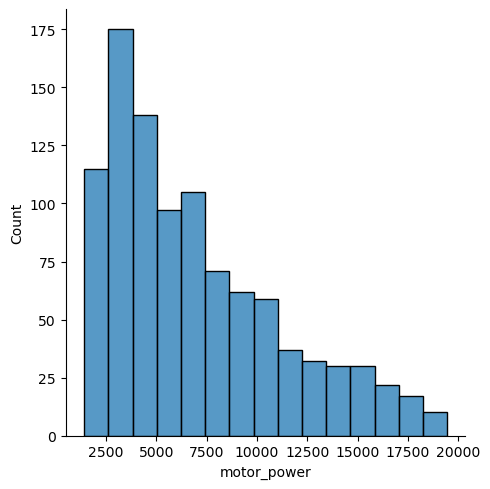

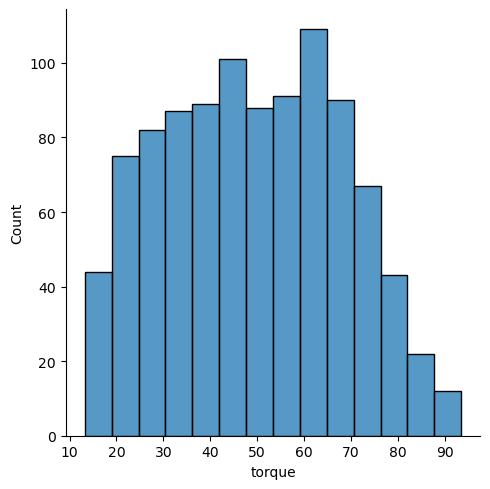

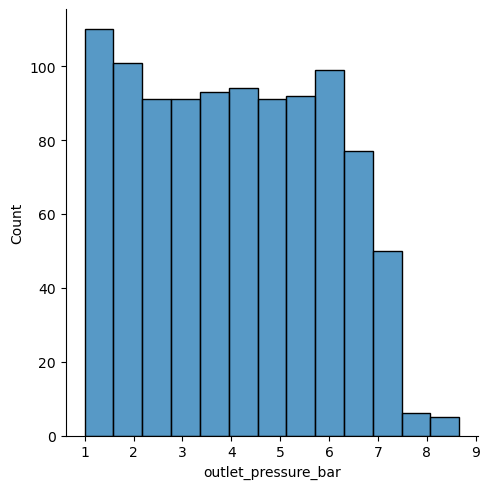

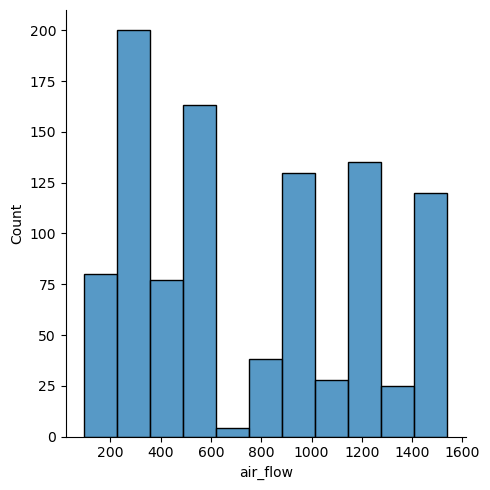

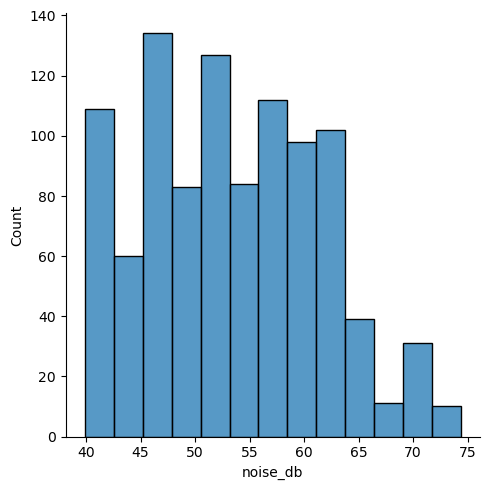

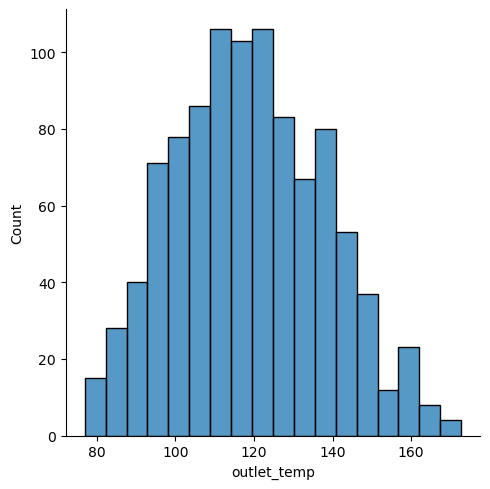

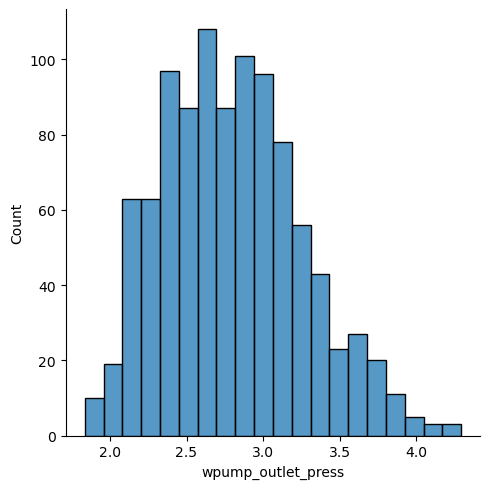

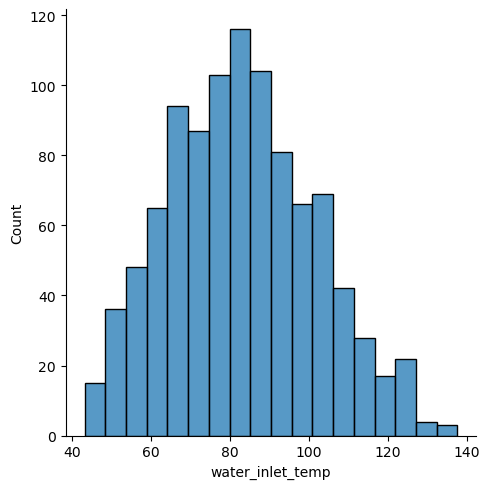

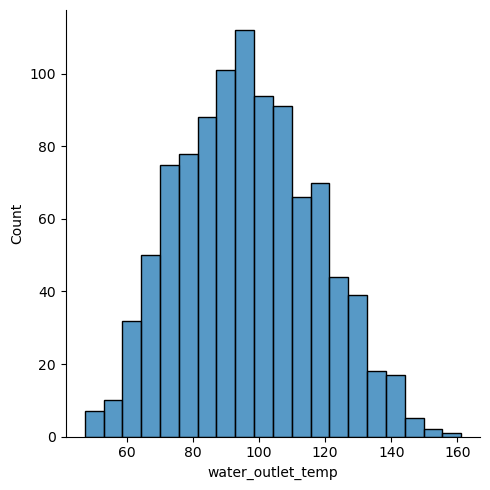

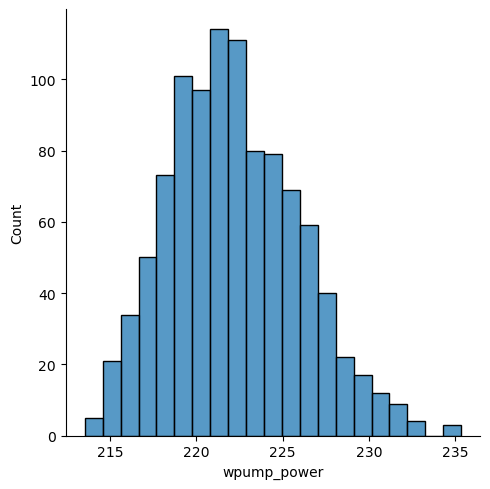

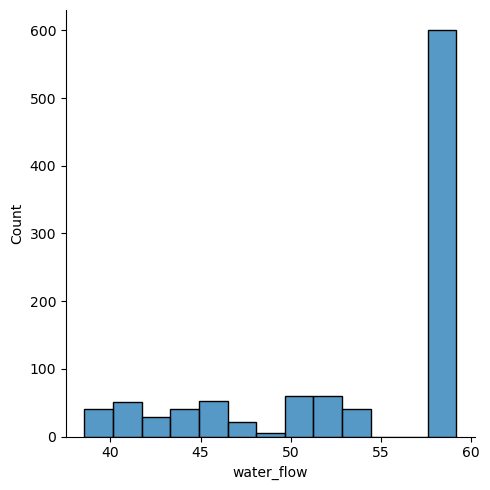

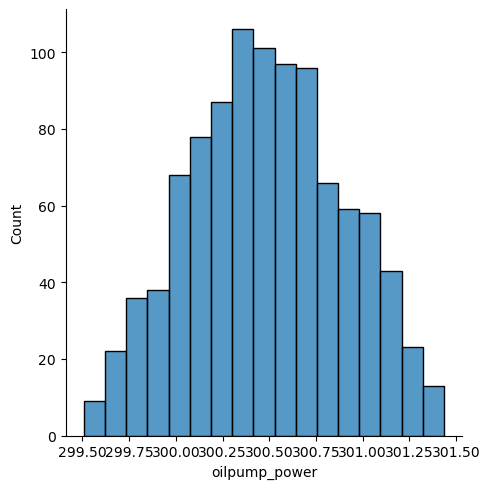

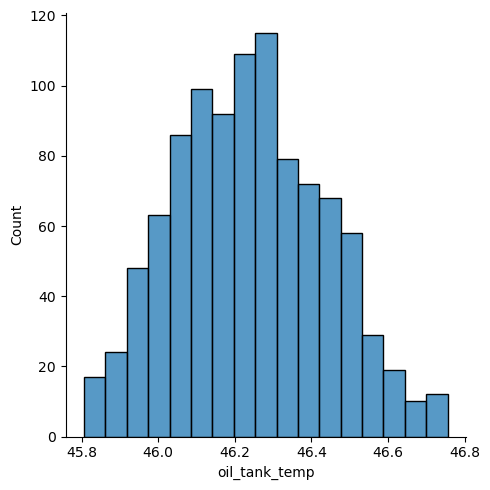

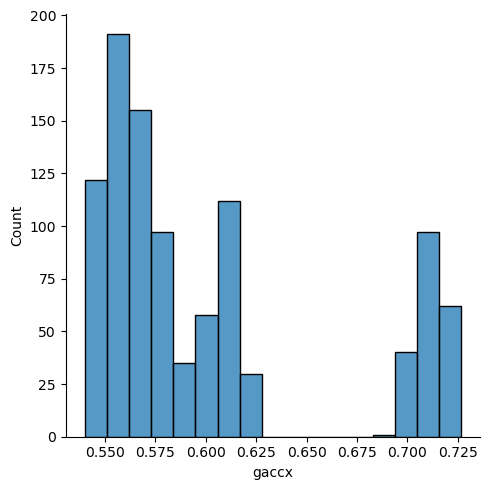

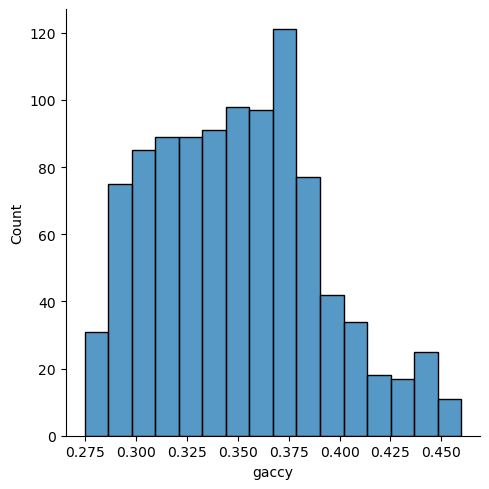

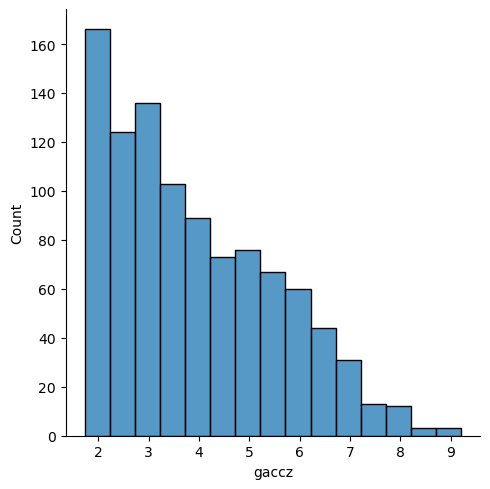

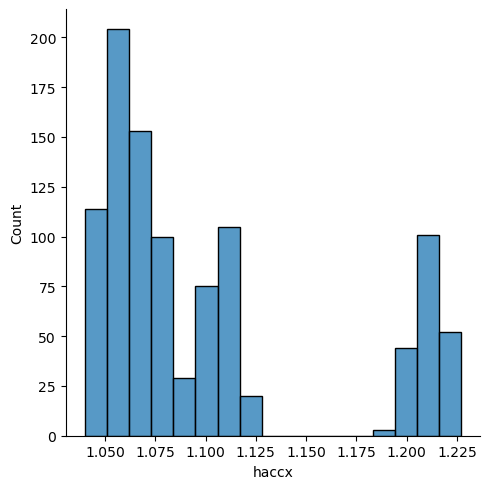

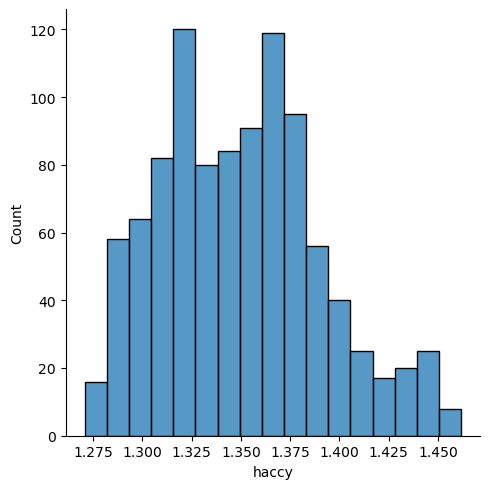

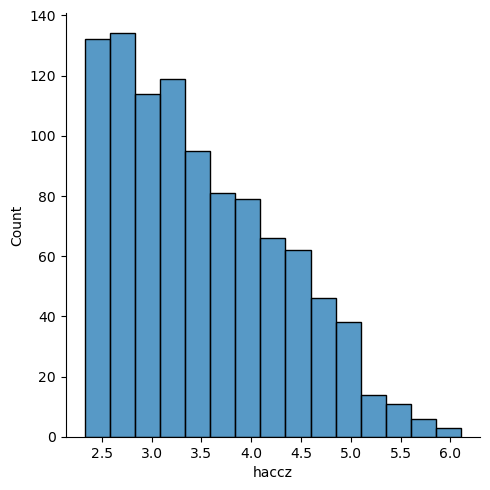

In [16]:
for col in df1.select_dtypes('float'):
    sns.displot(df1[col])

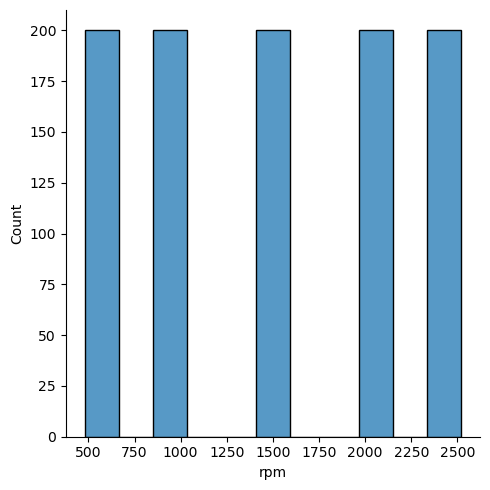

In [17]:
sns.displot(df1['rpm'])

#### Variables qualitatives

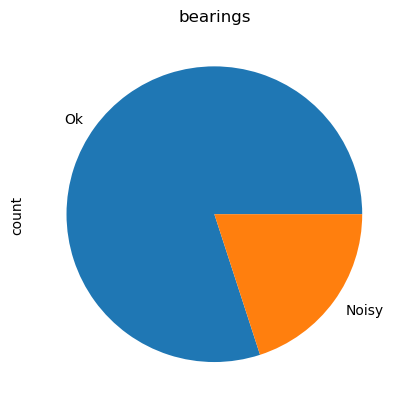

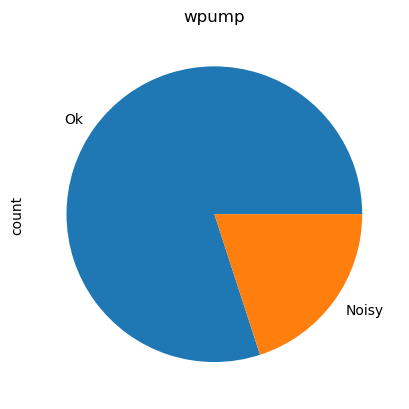

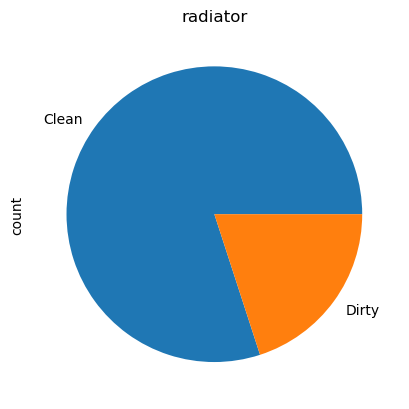

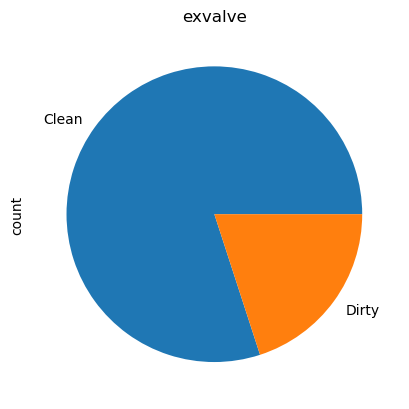

In [18]:
for col in df1.select_dtypes('object'):
    plt.figure()
    df1[col].value_counts().plot.pie()
    plt.title(col)

#### Relation Target/Values

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Appliquer KMeans pour regrouper en 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df1['Machine_Model'] = kmeans.fit_predict(df1[['rpm']])

# Identifier les colonnes numériques à normaliser
num_cols = ['rpm', 'motor_power', 'torque', 'outlet_pressure_bar', 'air_flow', 'noise_db', 'outlet_temp', 'wpump_outlet_press', 'water_inlet_temp',
            'water_outlet_temp', 'wpump_power','water_flow', 'oilpump_power', 'oil_tank_temp', 'gaccx', 'gaccy', 'gaccz', 'haccx',
           'haccy', 'haccz']  # Adapter selon ton dataset

df1[num_cols] = df1[num_cols].astype(float)

# Standardisation par modèle de machine
scaler = MinMaxScaler()

for model in df1['Machine_Model'].unique():  
    mask = df1['Machine_Model'] == model  # Filtrer les lignes correspondant à ce modèle
    df1.loc[mask, num_cols] = scaler.fit_transform(df1.loc[mask, num_cols])  # Appliquer le MinMaxScaler

C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\QuentinGENSE\anaconda3\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\QuentinGENSE\anaconda3\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\QuentinGENSE\anaconda3\Lib\subprocess.py", line 1540, in _execute_child
    hp, ht,

In [20]:
clean_radiator = df1[df1['radiator'] == 'Clean']
dirty_radiator = df1[df1['radiator'] == 'Dirty']

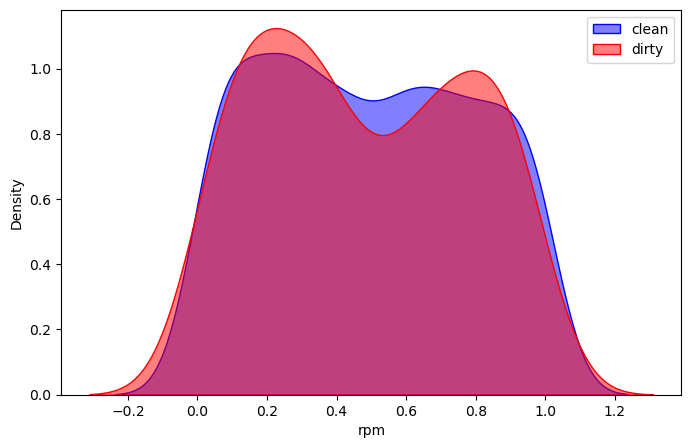

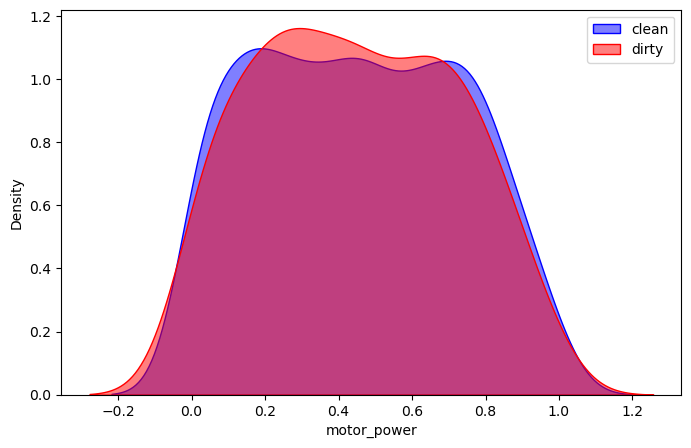

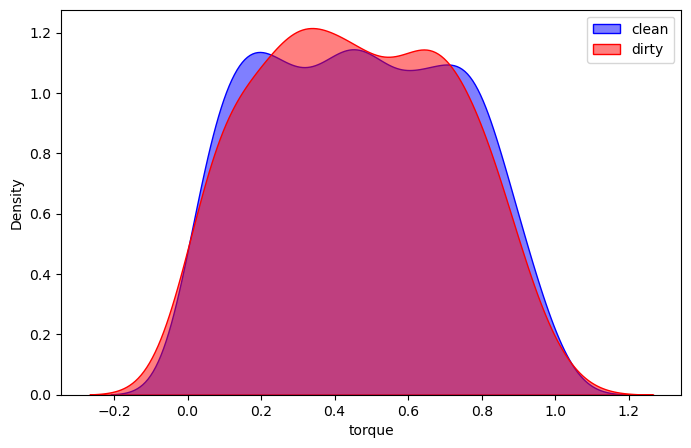

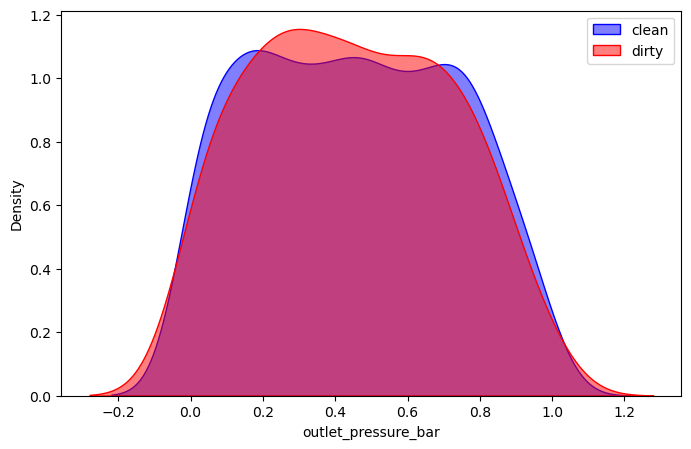

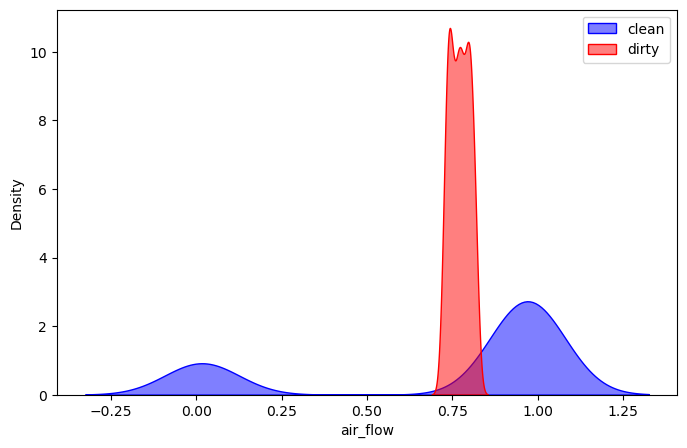

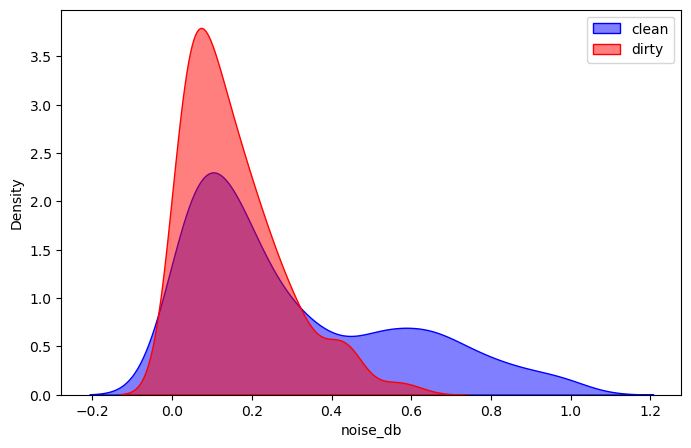

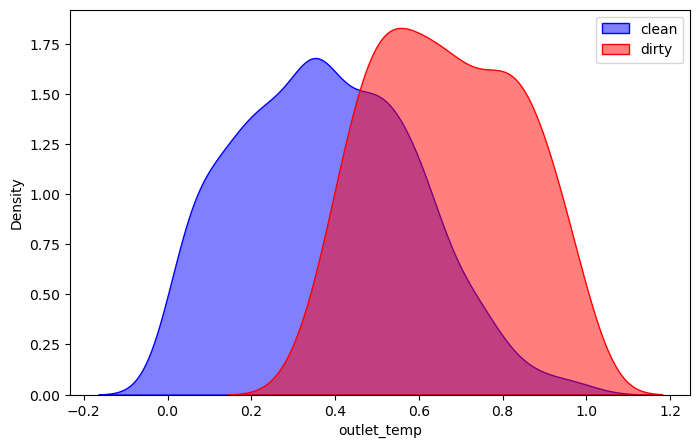

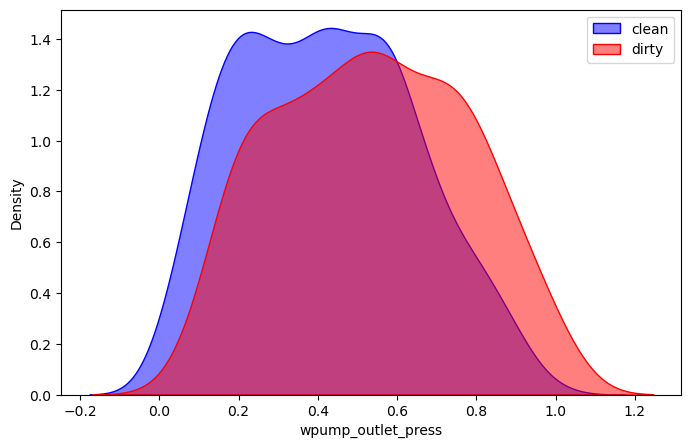

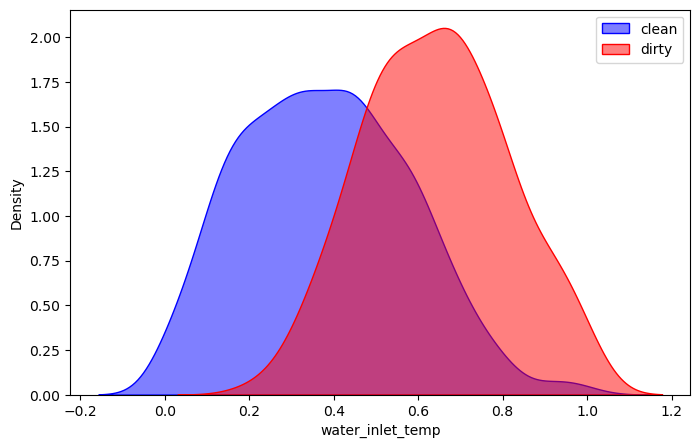

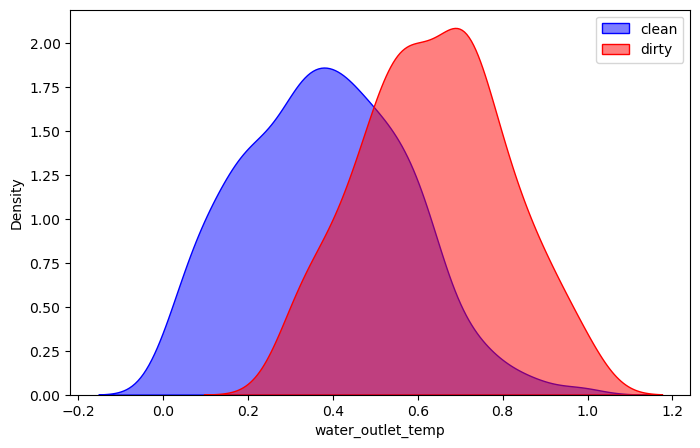

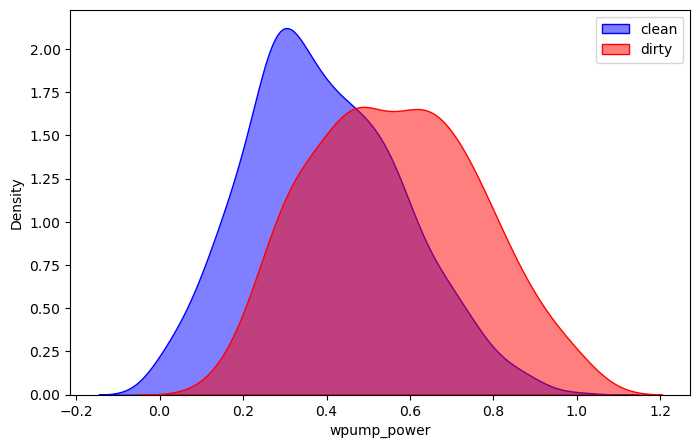

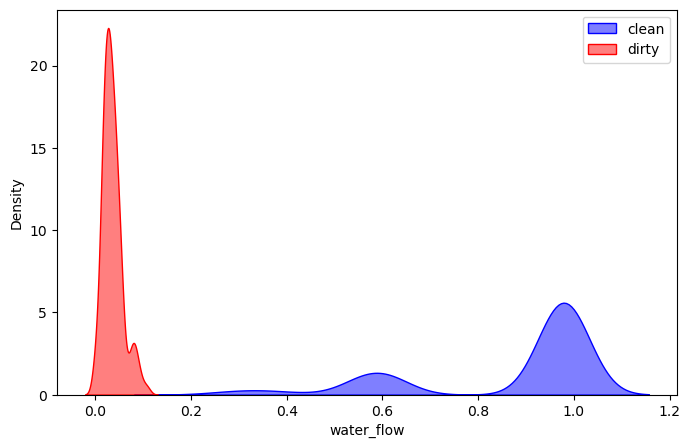

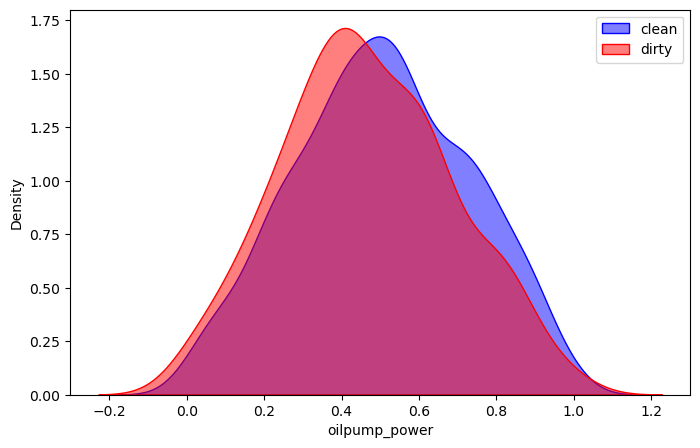

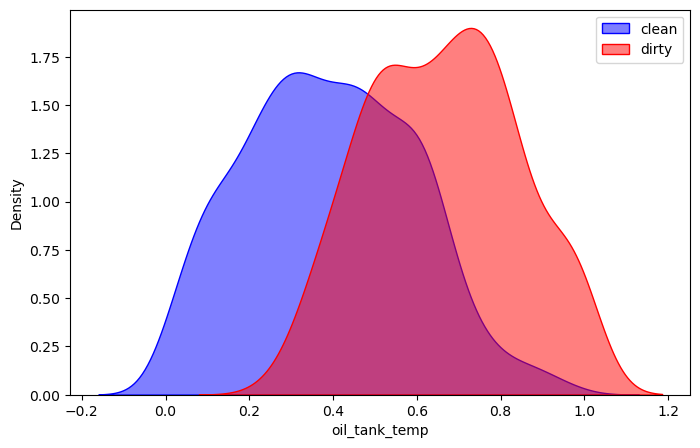

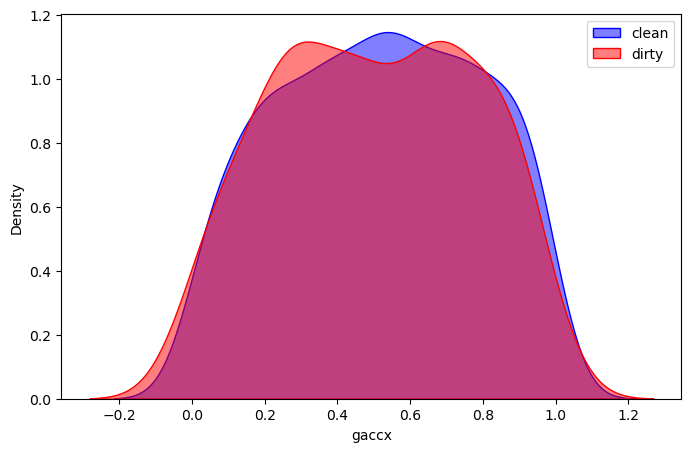

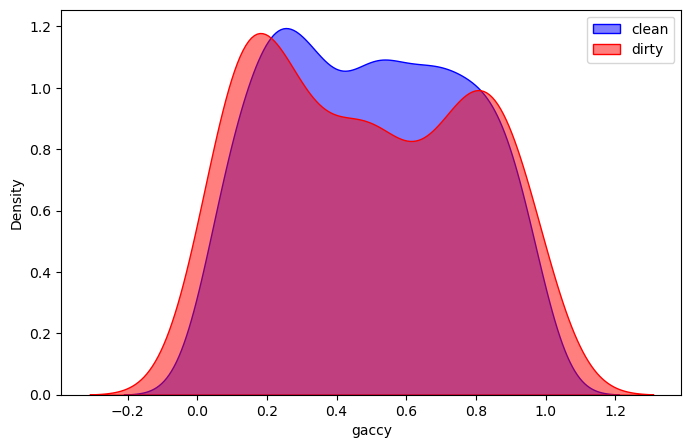

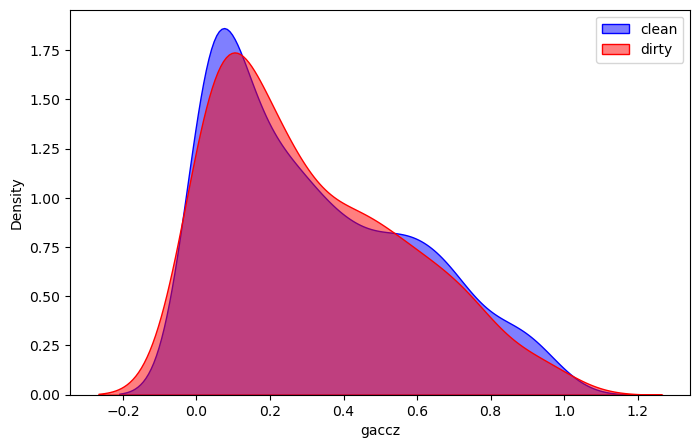

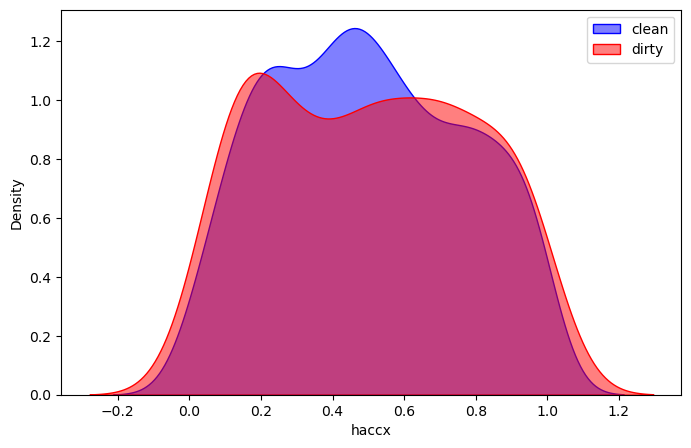

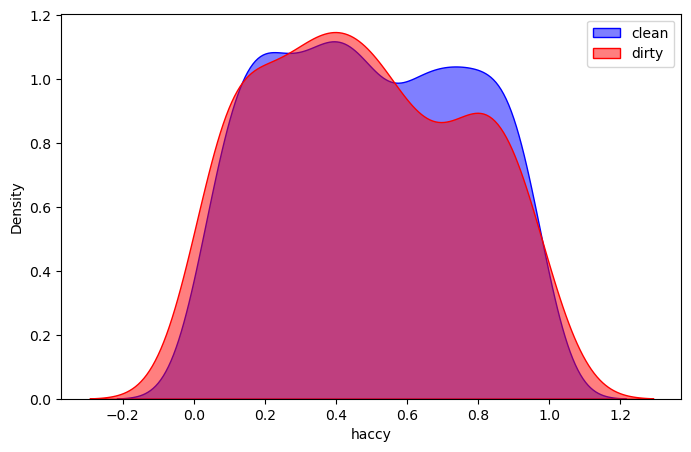

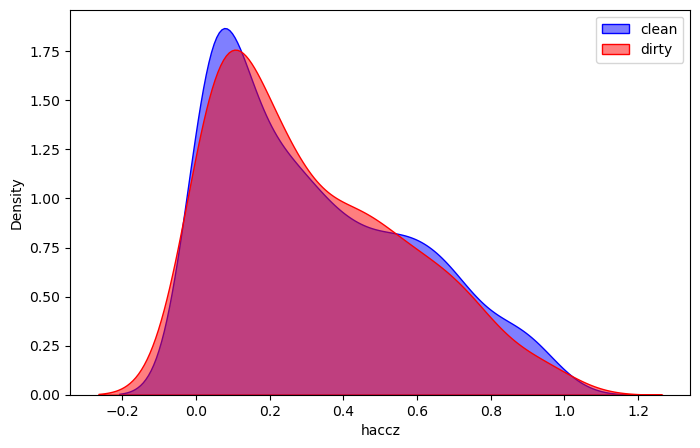

In [21]:
for col in df1.select_dtypes(include=['float']):
    plt.figure(figsize=(8,5))
    sns.kdeplot(clean_radiator[col], label='clean', fill=True, alpha=0.5, color='blue')
    sns.kdeplot(dirty_radiator[col], label='dirty', fill=True, alpha=0.5, color='red')
    plt.legend()
    plt.show()

In [22]:
clean_exvalve = df1[df1['exvalve'] == 'Clean']
dirty_exvalve = df1[df1['exvalve'] == 'Dirty']

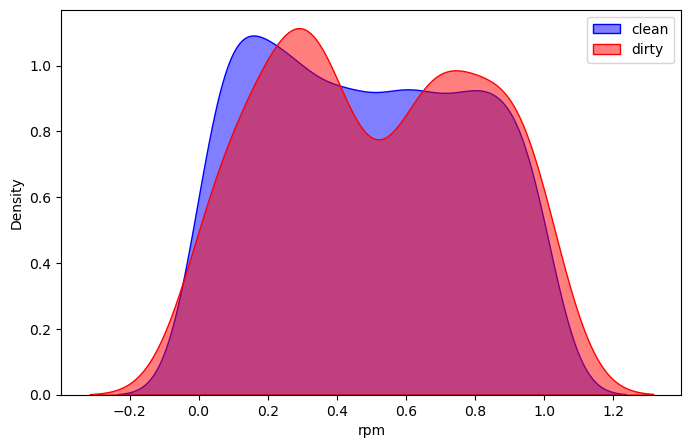

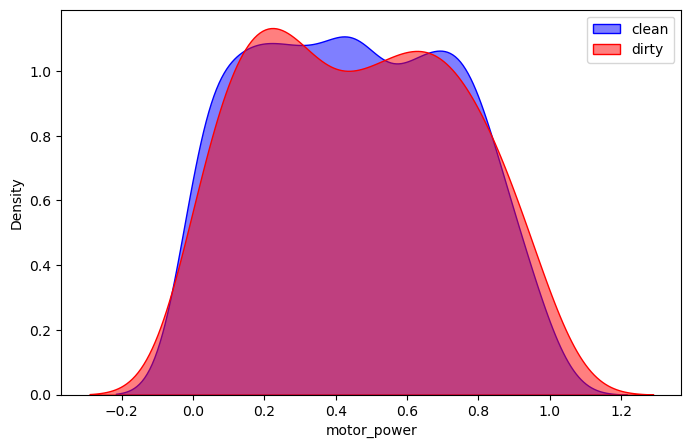

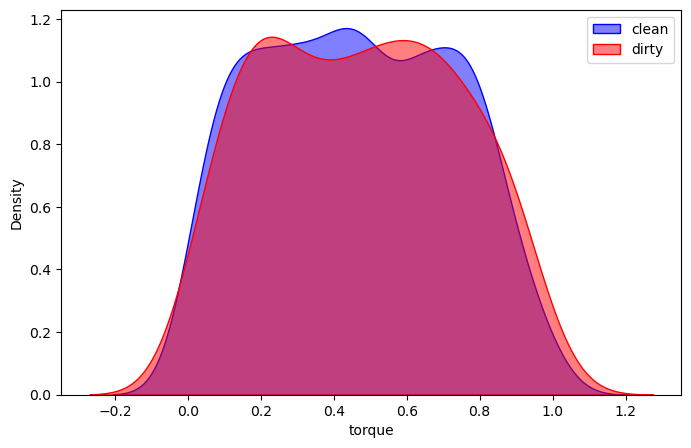

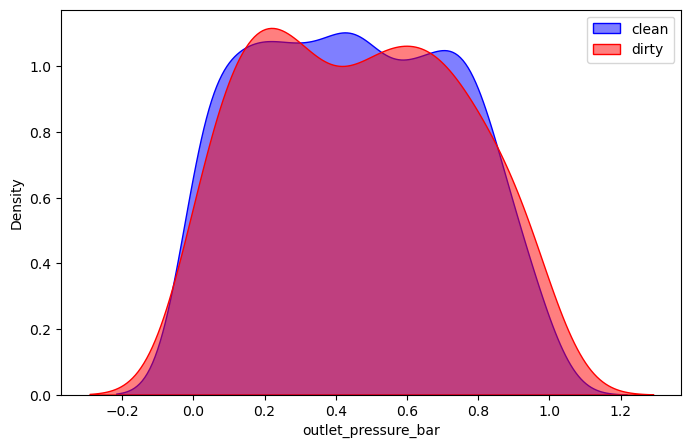

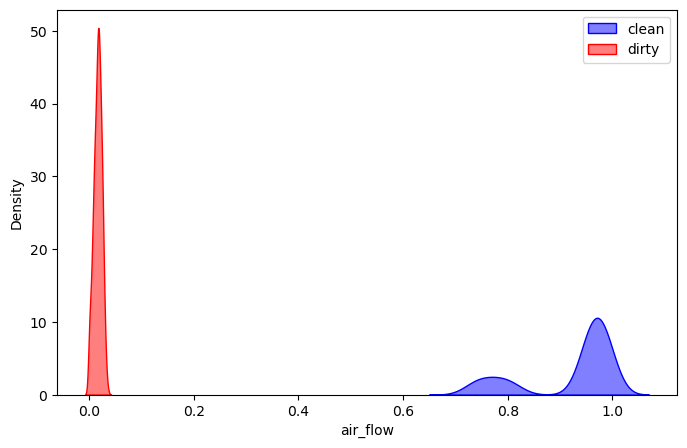

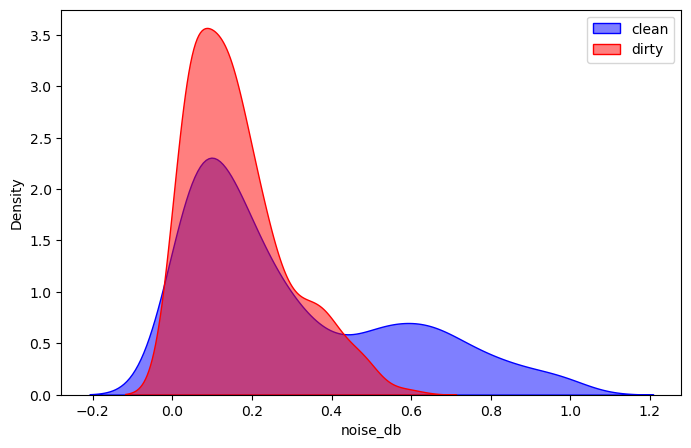

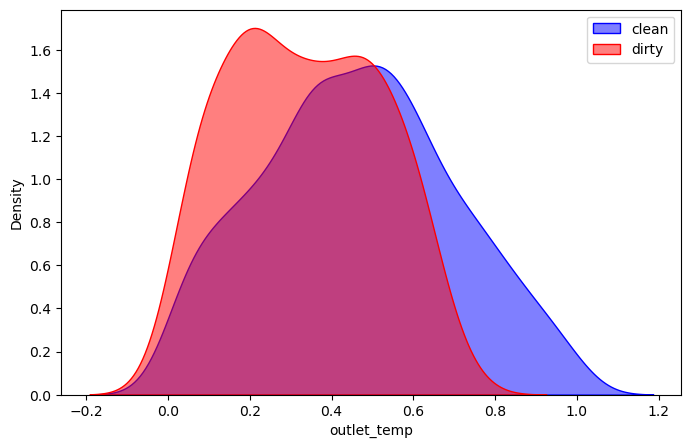

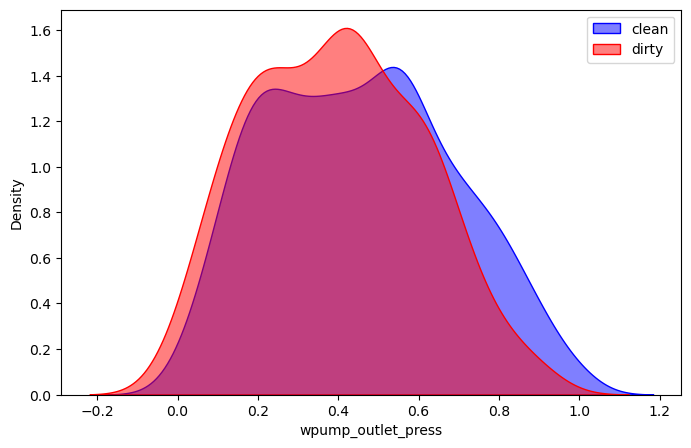

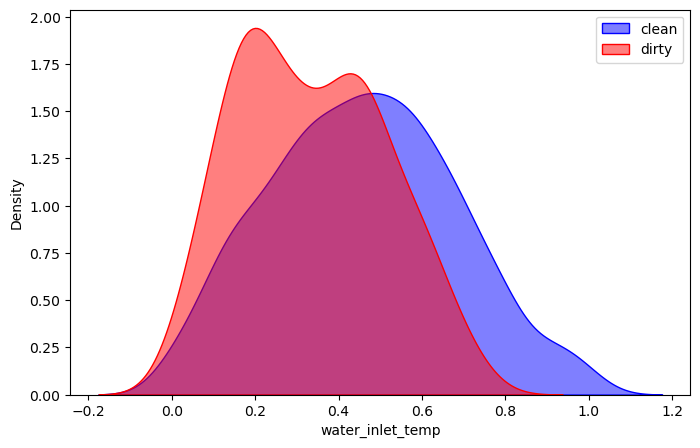

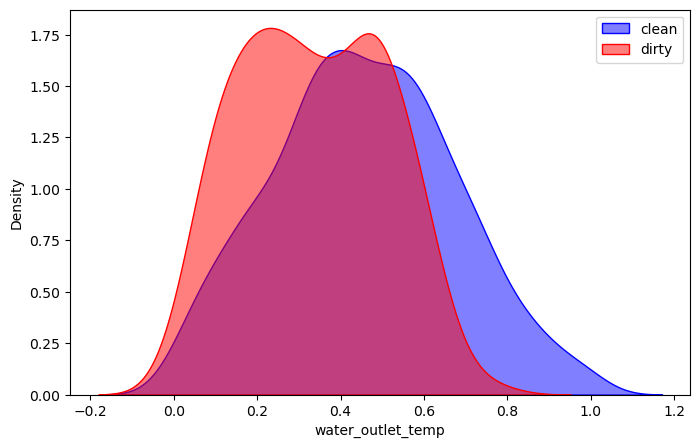

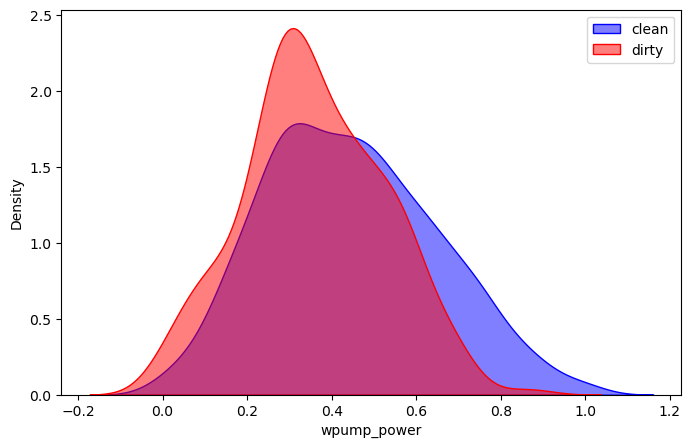

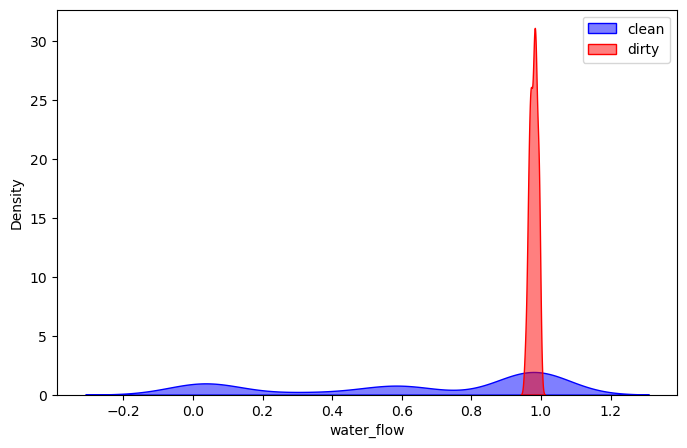

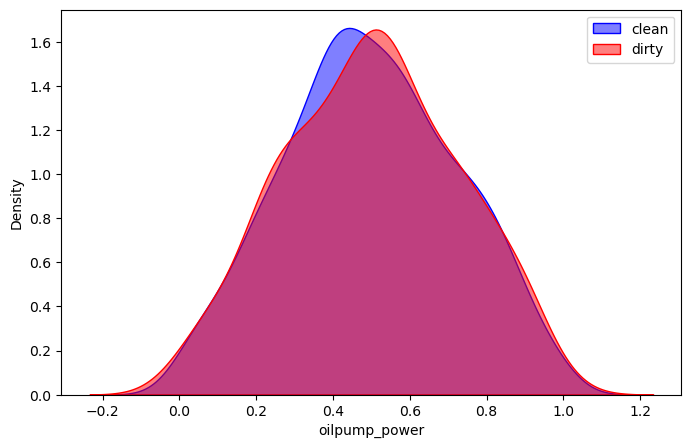

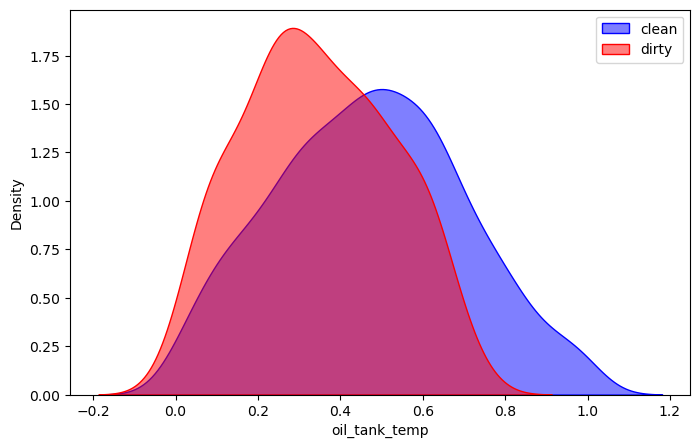

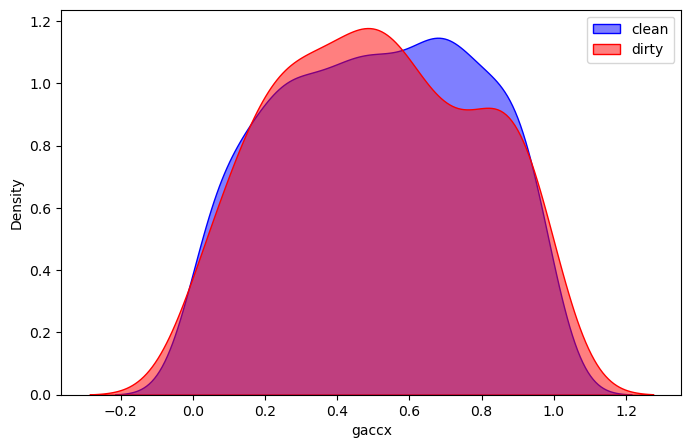

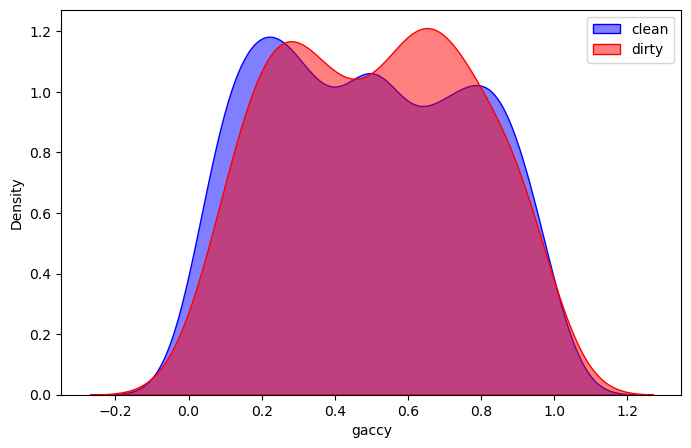

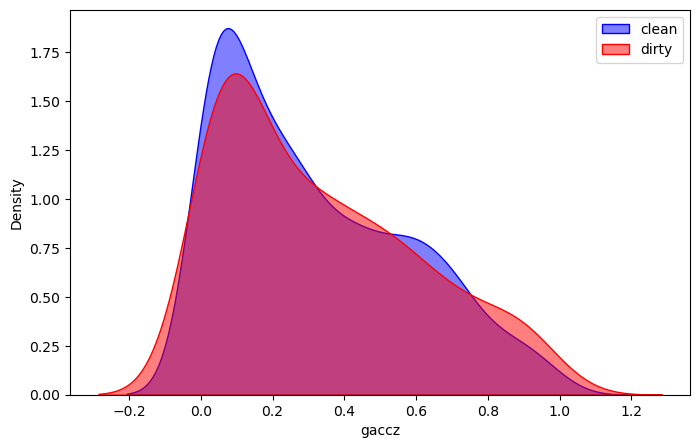

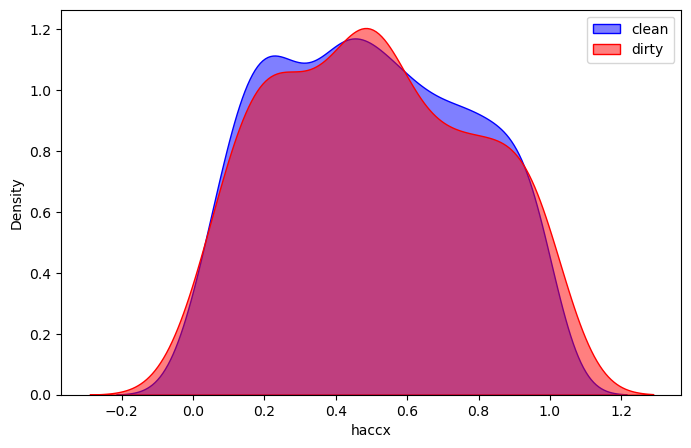

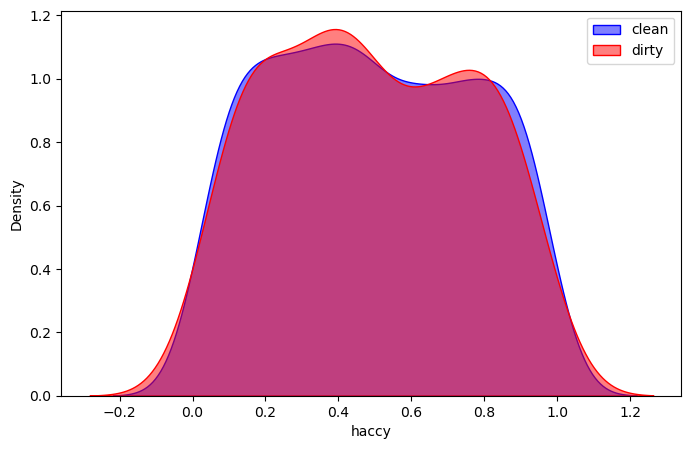

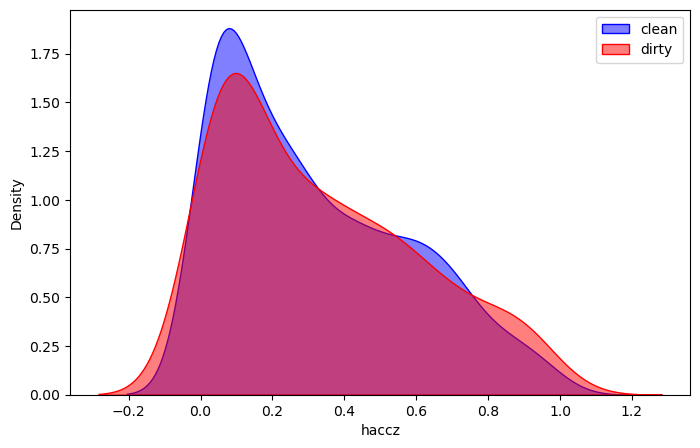

In [23]:
for col in df1.select_dtypes(include=['float']):
    plt.figure(figsize=(8,5))
    sns.kdeplot(clean_exvalve[col], label='clean', fill=True, alpha=0.5, color='blue')
    sns.kdeplot(dirty_exvalve[col], label='dirty', fill=True, alpha=0.5, color='red')
    plt.legend()
    plt.show()

In [24]:
ok_wpump = df1[df1['wpump'] == 'Ok']
noisy_wpump = df1[df1['wpump'] == 'Noisy']

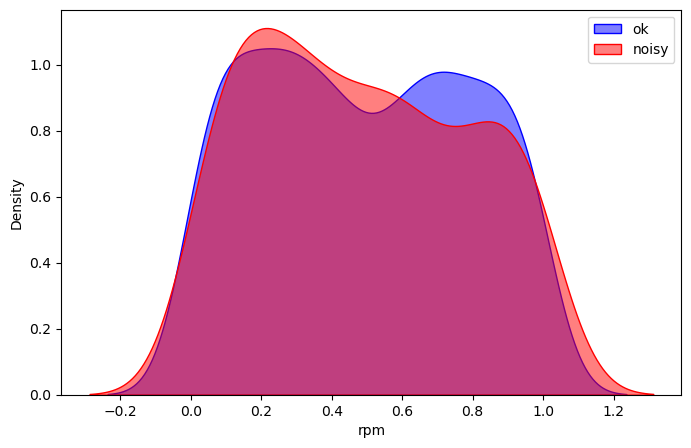

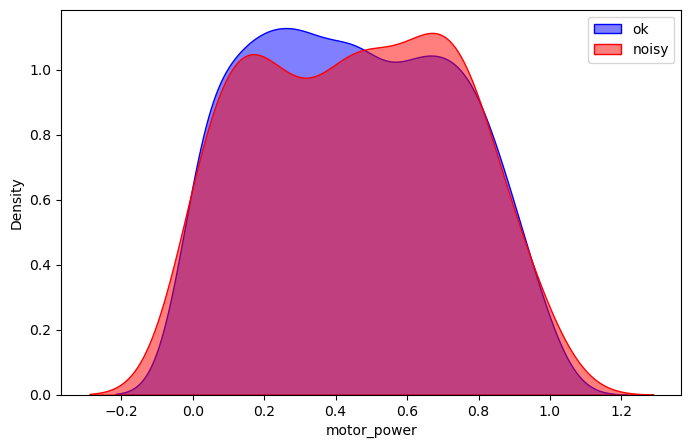

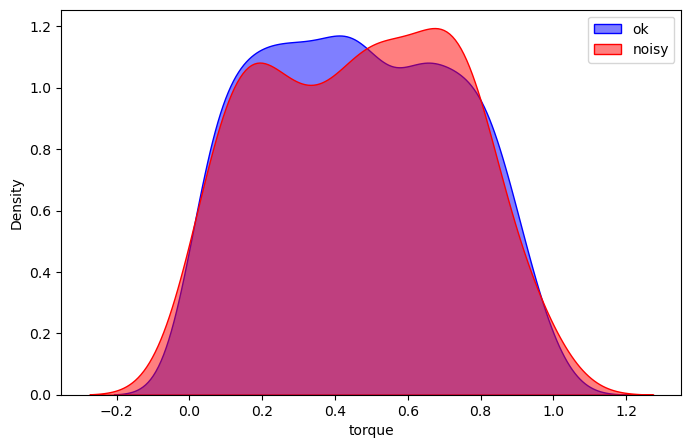

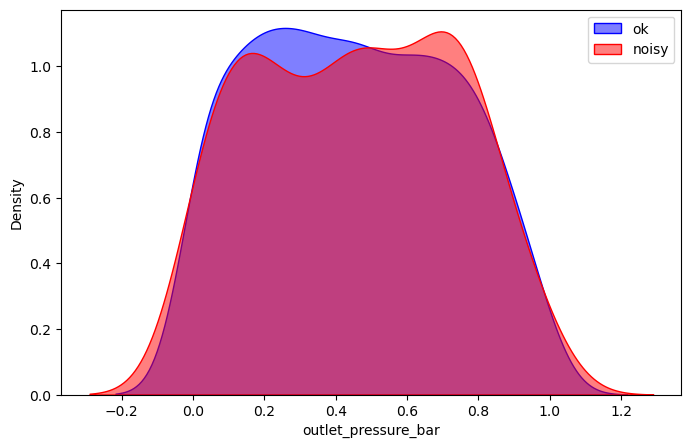

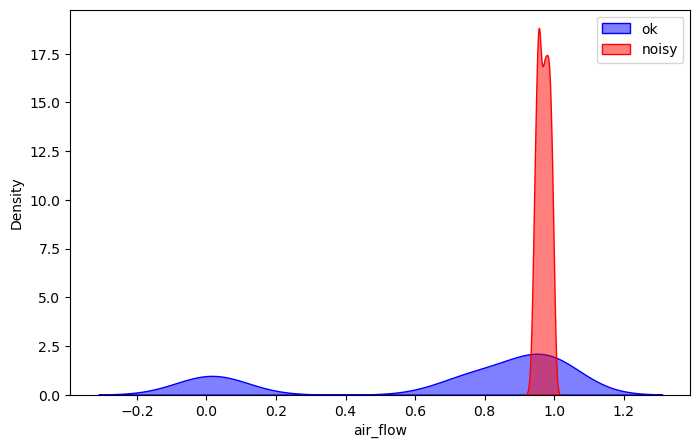

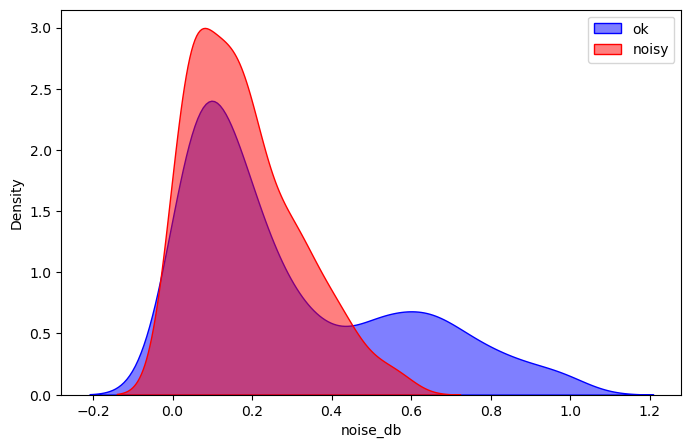

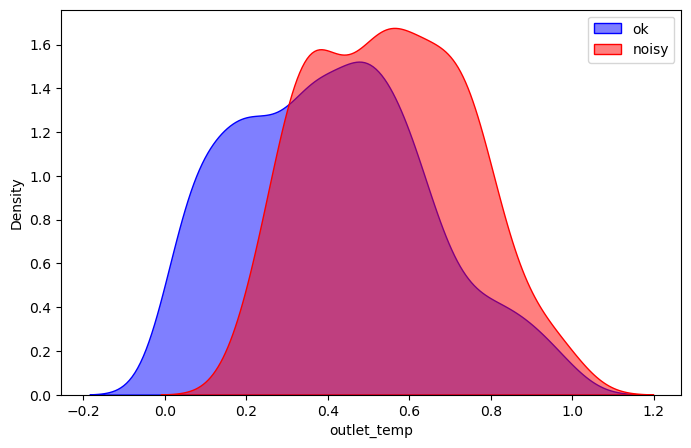

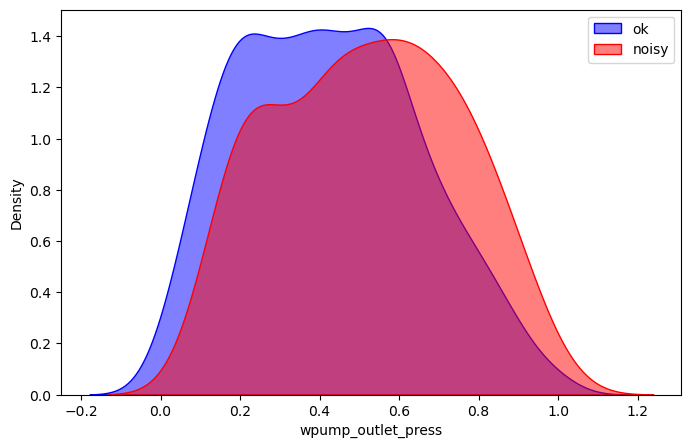

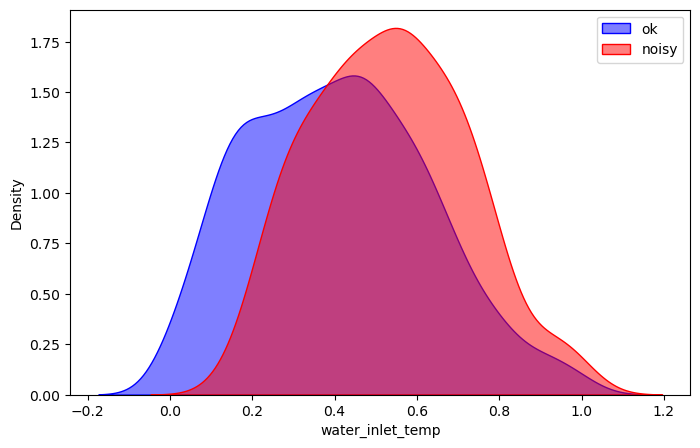

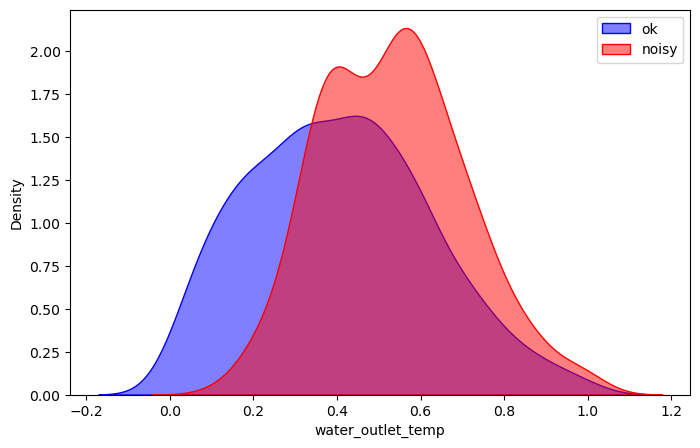

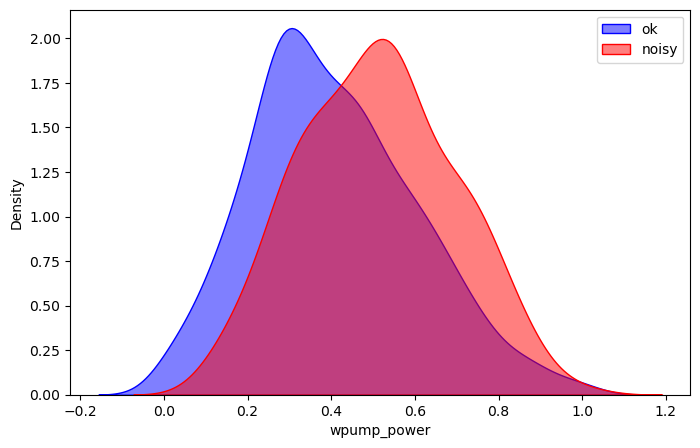

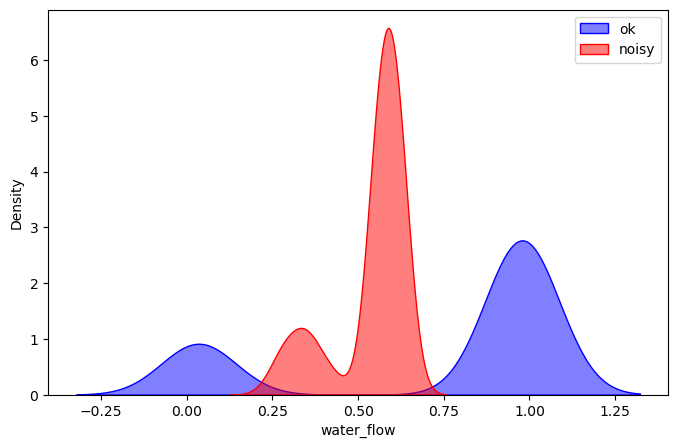

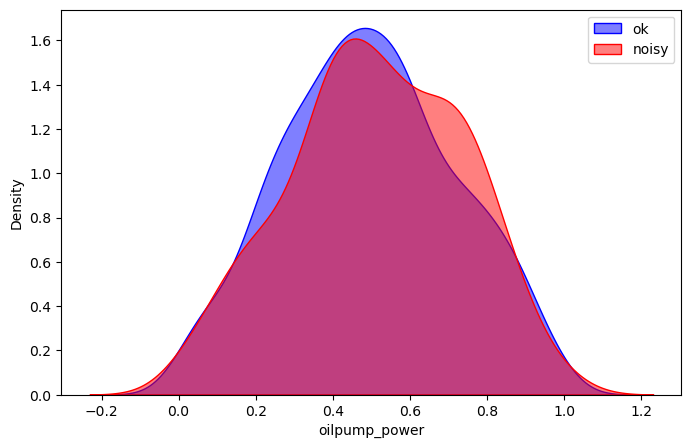

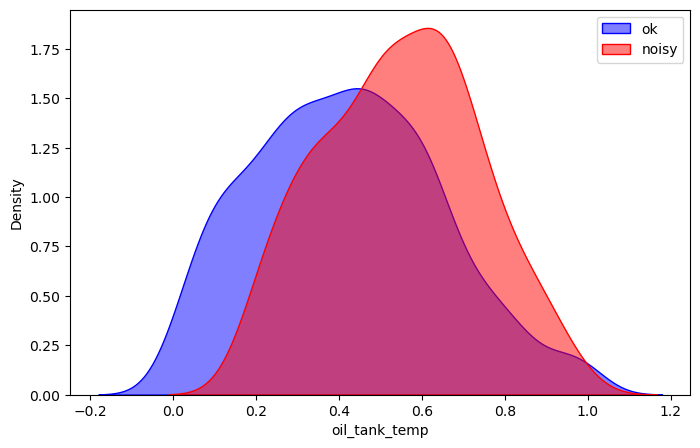

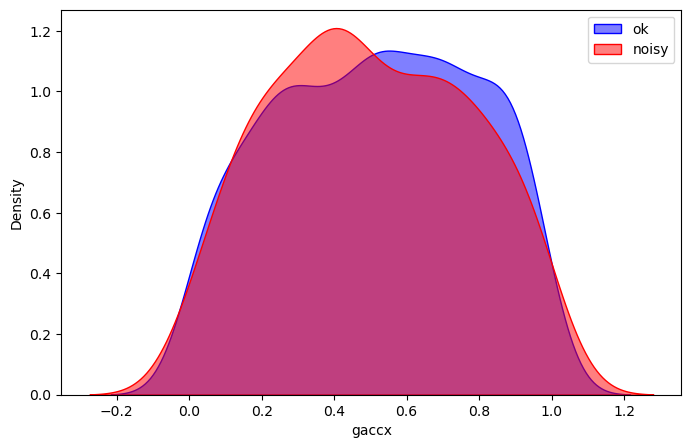

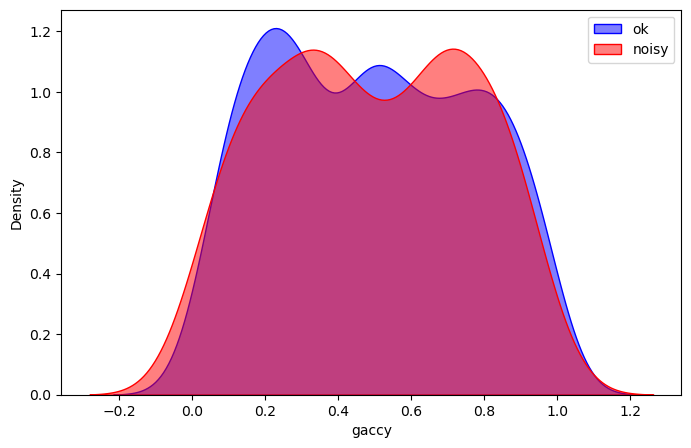

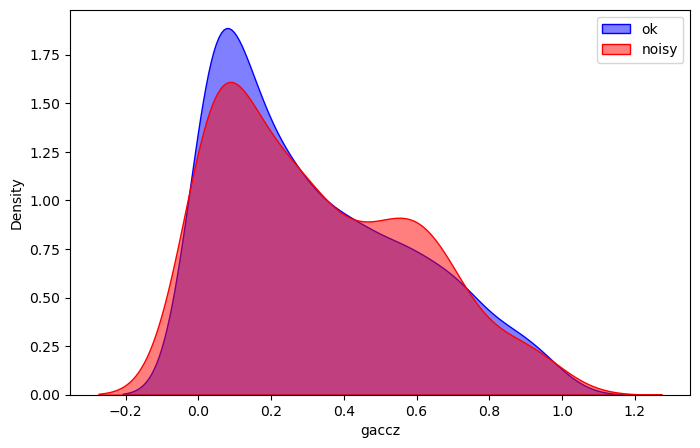

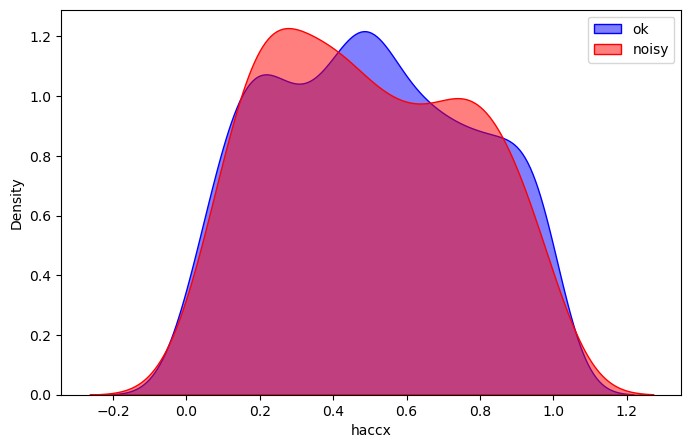

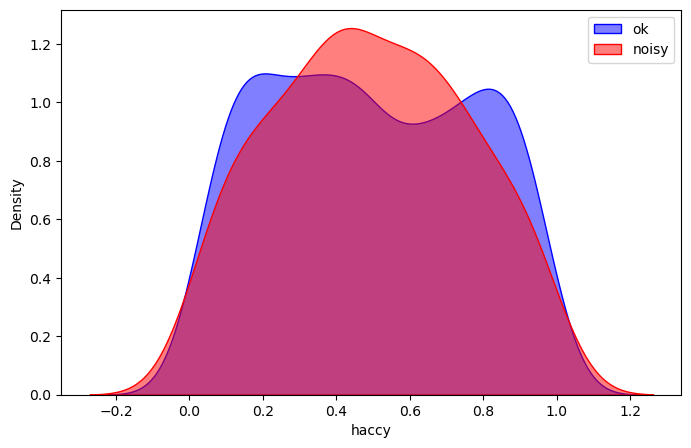

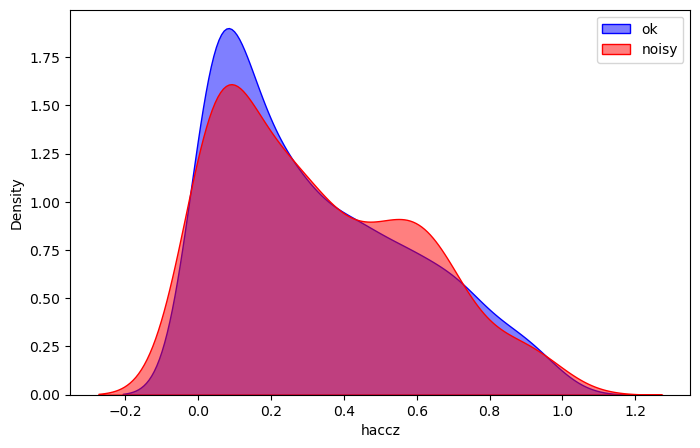

In [25]:
for col in df1.select_dtypes(include=['float']):
    plt.figure(figsize=(8,5))
    sns.kdeplot(ok_wpump[col], label='ok', fill=True, alpha=0.5, color='blue')
    sns.kdeplot(noisy_wpump[col], label='noisy', fill=True, alpha=0.5, color='red')
    plt.legend()
    plt.show()

In [26]:
ok_bearings = df1[df1['bearings'] == 'Ok']
noisy_bearings = df1[df1['bearings'] == 'Noisy']

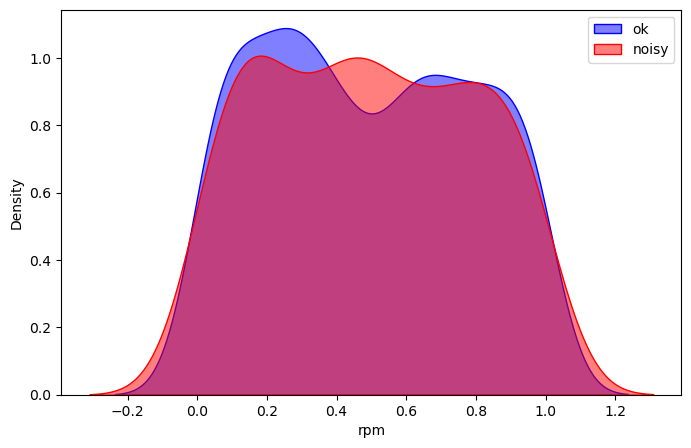

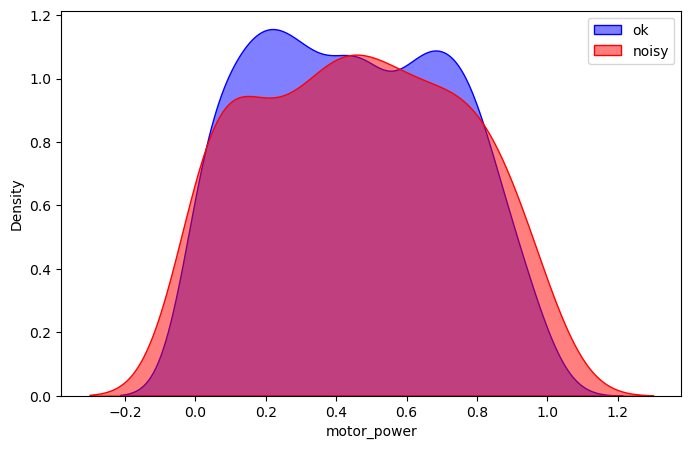

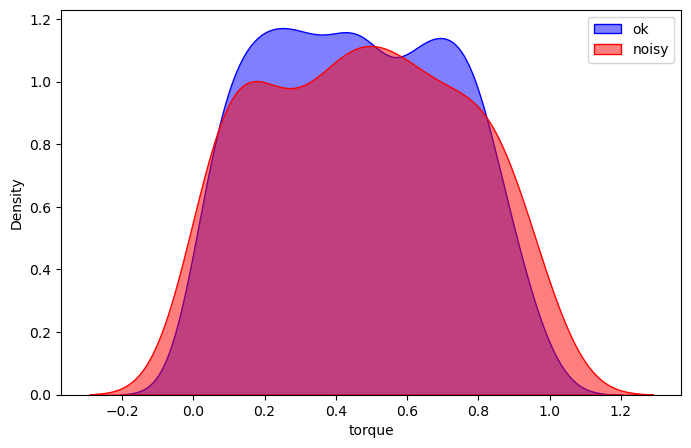

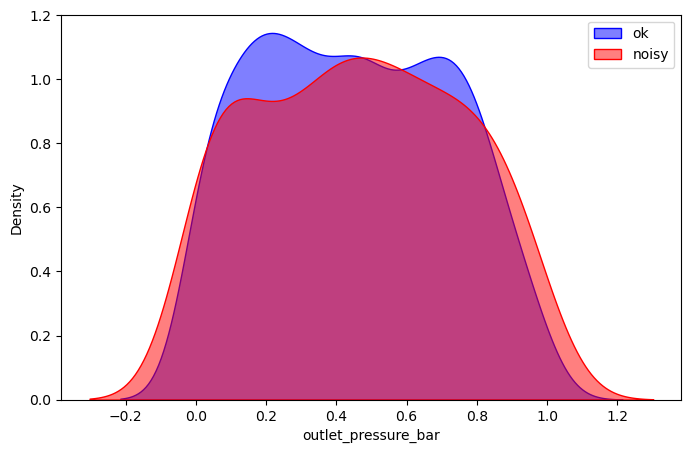

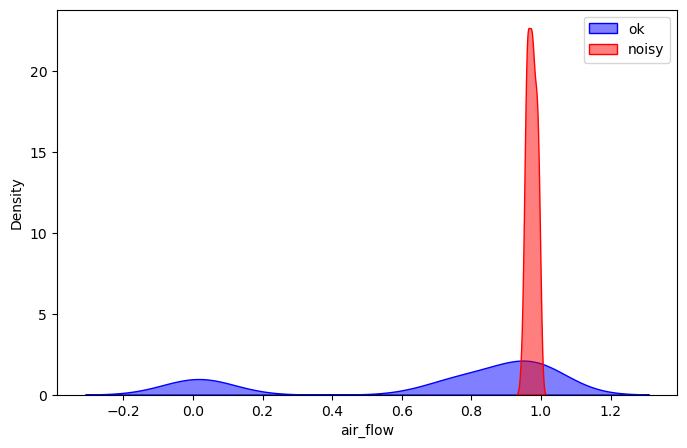

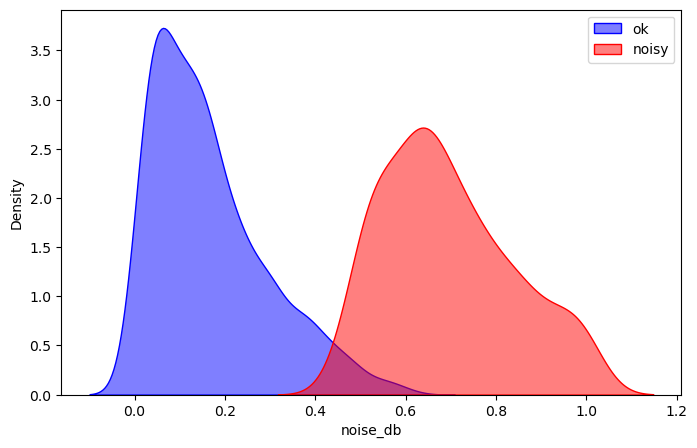

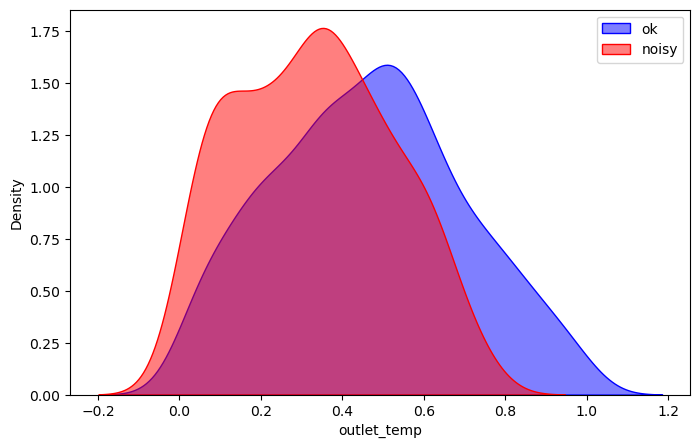

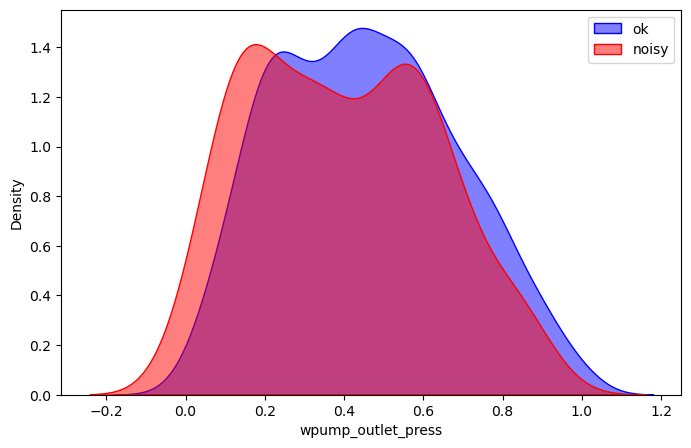

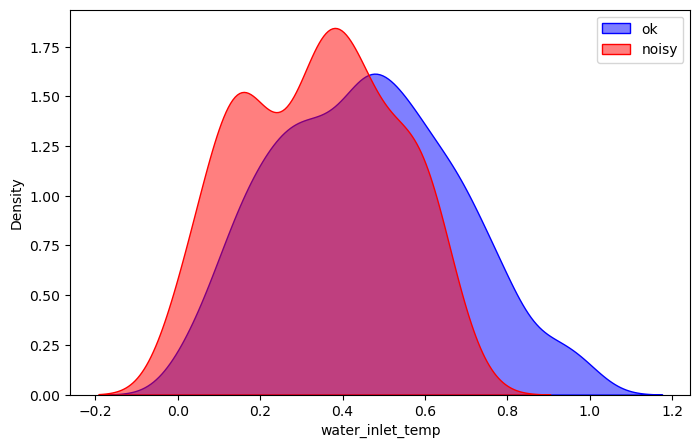

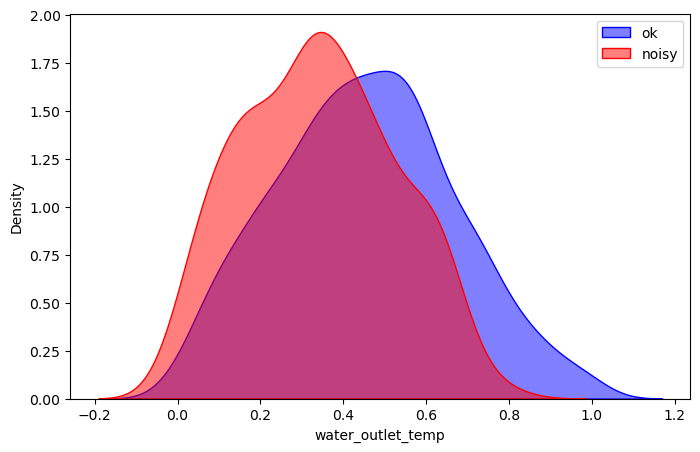

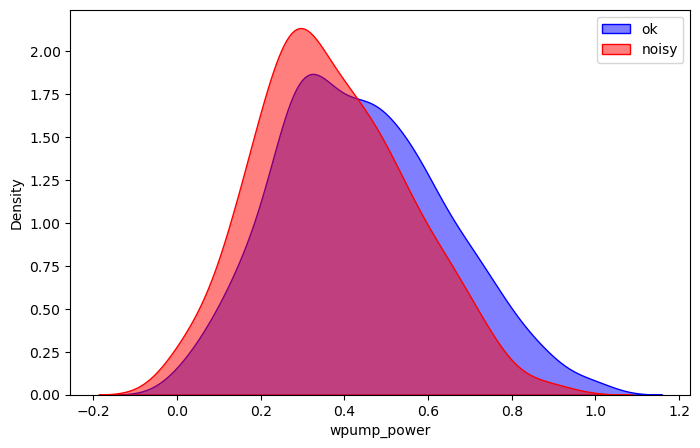

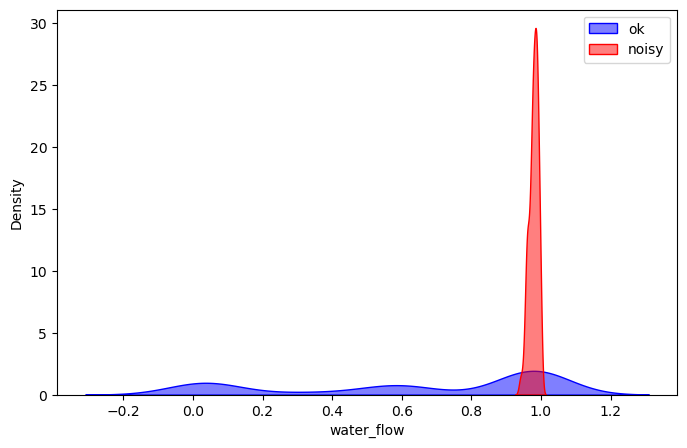

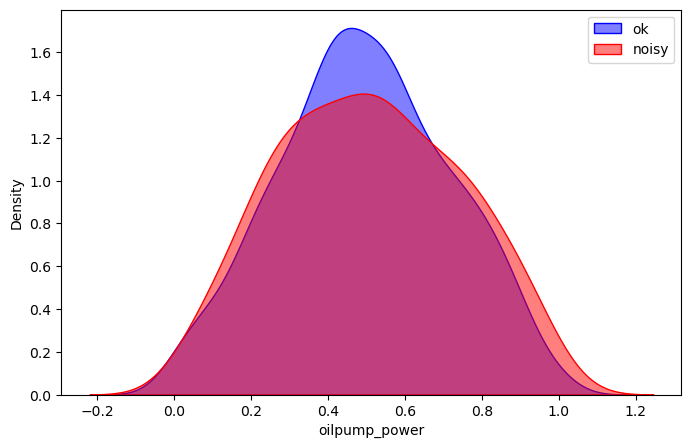

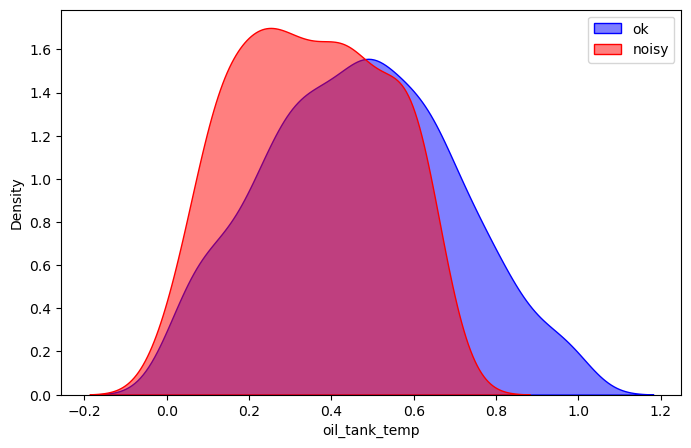

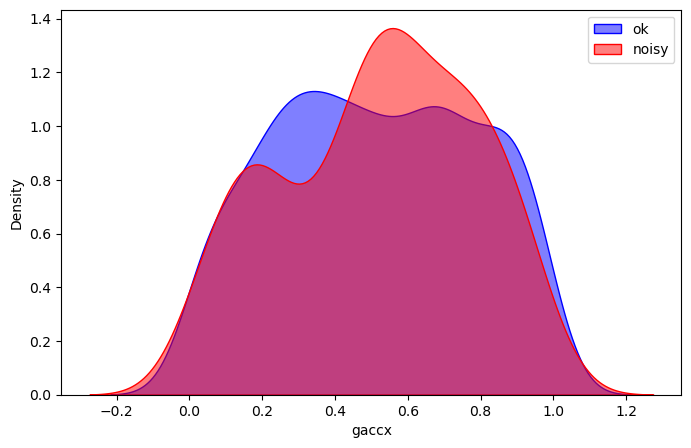

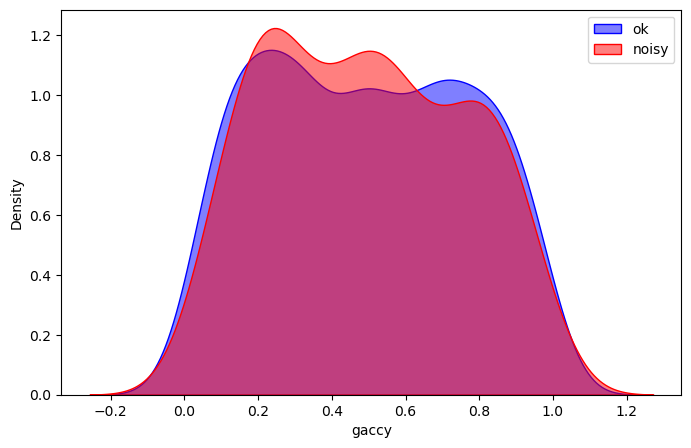

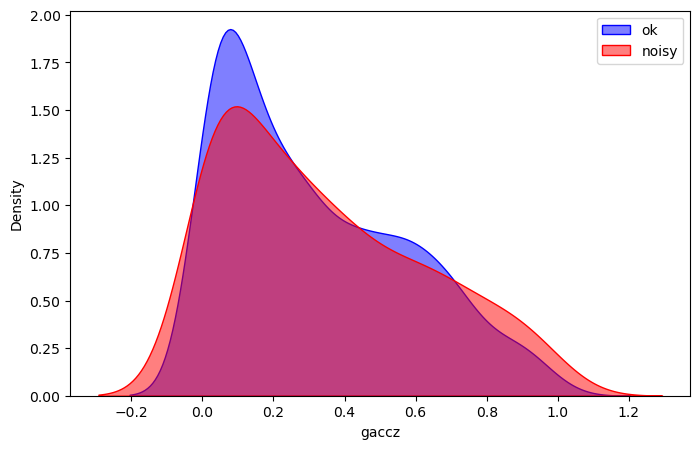

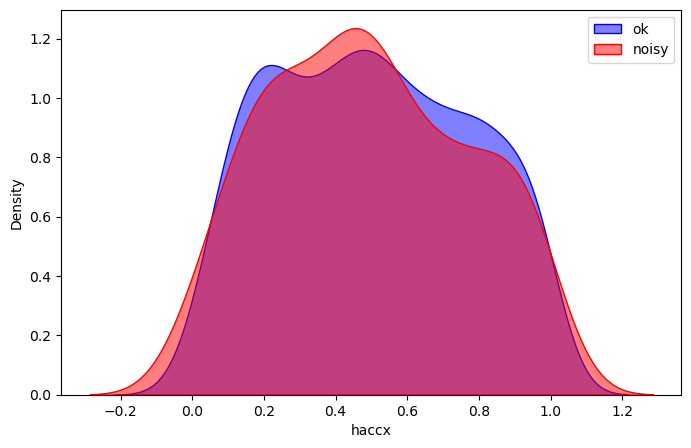

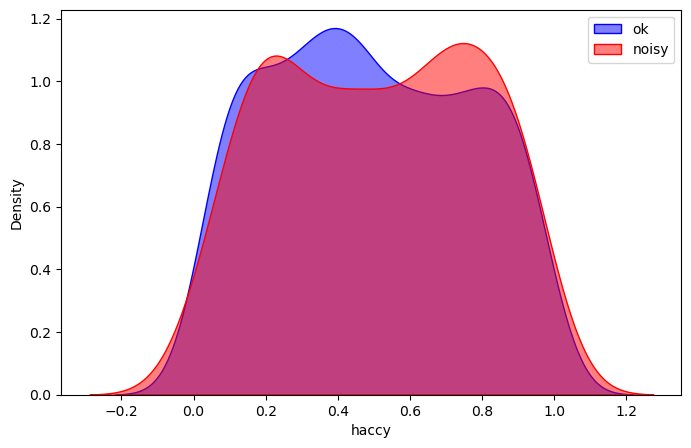

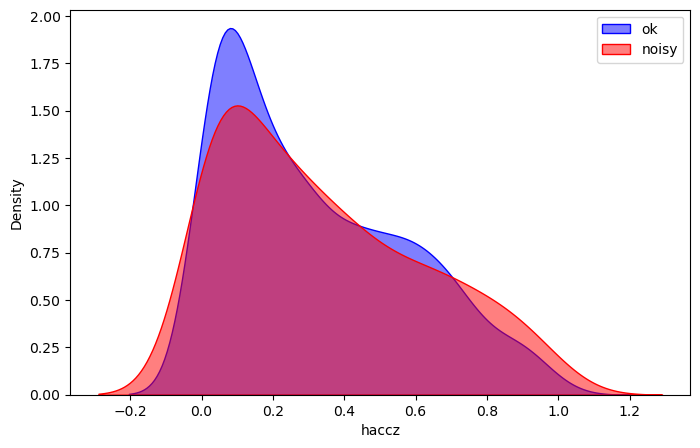

In [27]:
for col in df1.select_dtypes(include=['float']):
    plt.figure(figsize=(8,5))
    sns.kdeplot(ok_bearings[col], label='ok', fill=True, alpha=0.5, color='blue')
    sns.kdeplot(noisy_bearings[col], label='noisy', fill=True, alpha=0.5, color='red')
    plt.legend()
    plt.show()

In [29]:
df1.head()

,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,water_outlet_temp,...,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,Machine_Model
0,0.500,0.001037,0.008888,0.000000,1.000000,0.085942,0.032623,0.779568,0.000000,0.000000,...,0.285756,0.006049,0.594658,0.499723,0.006508,Ok,Ok,Clean,Clean,2
1,0.000,0.014670,0.065919,0.012448,0.999651,0.041526,0.000000,0.491811,0.078436,0.120984,...,0.917860,0.010637,0.537990,0.242284,0.000668,Ok,Ok,Clean,Clean,3
2,0.000,0.054568,0.098544,0.056708,0.995721,0.093677,0.011330,0.187620,0.123748,0.056366,...,0.852070,0.027845,0.514346,0.159850,0.016913,Ok,Ok,Clean,Clean,2
3,0.000,0.098694,0.143551,0.106193,0.993834,0.056566,0.062441,0.175473,0.073084,0.178321,...,0.171394,0.047450,0.579986,0.829934,0.056453,Ok,Ok,Clean,Clean,4
4,0.375,0.110337,0.170061,0.112341,0.993162,0.124908,0.044787,0.345470,0.147761,0.117842,...,0.286655,0.041657,0.473300,0.461403,0.040822,Ok,Ok,Clean,Clean,2
